# Libreries

In [7]:
import os
import sys
import itertools

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


# Definitions

In [8]:
sys.path.insert(0, "../../")
from config import CROPPED_PATH, MODELS_PATH

# Paths
TEST_PATH = os.path.join(CROPPED_PATH, 'onion_cell_merged', 'labeled_images', 'test')
MODEL_PATH= os.path.join(MODELS_PATH, 'supervised', 'model_Encoder_SSIM+MAE0 (1).keras')

# Confusion matrix

In [9]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [10]:
results = []
def plot_conf_matrix(model, generator, titulo='Confusion matrix'):
    ### RETRIVE TEST LABEL FROM GENERATOR ###
    test_num = sum(1 for _ in generator)
    label_test = []
    pred_test = []
    for i, batch in enumerate(generator):
        X, y = batch
        label_test.append(y)
        predictions = model.predict(X,verbose=0)
        predictions = tf.nn.softmax(predictions)
        pred_test.append(predictions)

    label_test = np.argmax(np.vstack(label_test), axis=1)
    

    ### COMPUTE PREDICTIONS ON TEST DATA ###
    pred_test = np.argmax(np.vstack(pred_test), axis=1)
    #rint(pred_test)
    accuracy=accuracy_score(label_test, pred_test)
    recall=recall_score(label_test, pred_test,pos_label=0)
    specificity=recall_score(label_test, pred_test,pos_label=1)
    precision = precision_score(label_test, pred_test, pos_label=0)
    # pred_test = pred_test[:label_test.shape[0],]
    ### ACCURACY ON TEST DATA ###
    print("-" * 40)
    print('ACCURACY:', accuracy)
    print('RECALL:',recall)
    print('PRECISION:', precision)
    print('SPECIFICITY:',specificity)
    print("-" * 40)
    print("\n")
    ### CONFUSION MATRIX ON TEST DATA ###
    cnf_matrix = confusion_matrix(label_test, pred_test)
    results.append({'Model': titulo, 'Accuracy': accuracy , 'Recall':recall,'Precision':precision,'Specificity':specificity})

    plt.figure(figsize=(7,7))
    plot_confusion_matrix(cnf_matrix, classes=['cell', 'not'], title=titulo)
    plt.title(titulo)
    plt.show()

# Predictions - total

I0000 00:00:1746185025.156722   86037 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 994 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1746185025.623770   89545 service.cc:152] XLA service 0x762960021fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746185025.623781   89545 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-05-02 08:23:45.628653: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746185025.670460   89545 cuda_dnn.cc:529] Loaded cuDNN version 90701
I0000 00:00:1746185025.935824   89545 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


----------------------------------------
ACCURACY: 0.93
RECALL: 0.86
PRECISION: 1.0
SPECIFICITY: 1.0
----------------------------------------




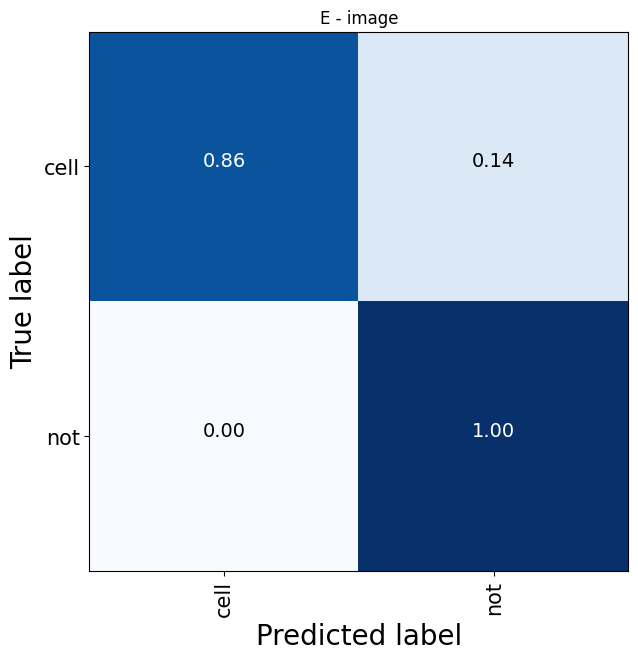

----------------------------------------
ACCURACY: 1.0
RECALL: 1.0
PRECISION: 1.0
SPECIFICITY: 1.0
----------------------------------------




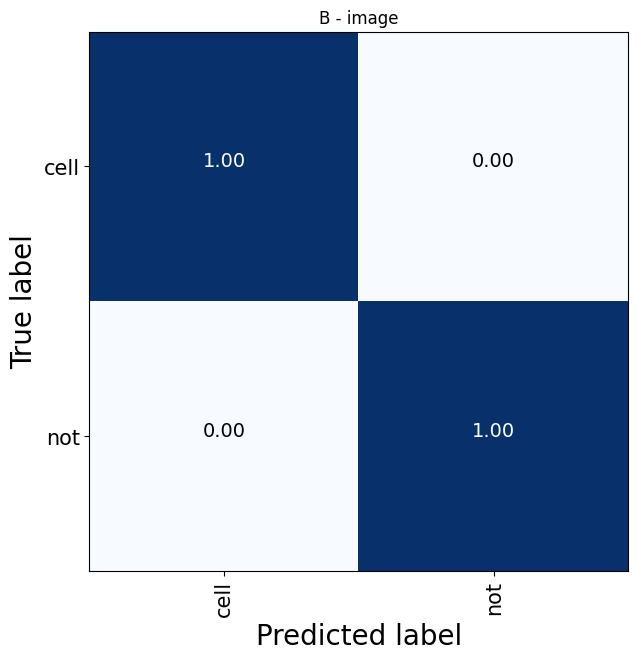

----------------------------------------
ACCURACY: 0.93
RECALL: 0.98
PRECISION: 0.8909090909090909
SPECIFICITY: 0.88
----------------------------------------




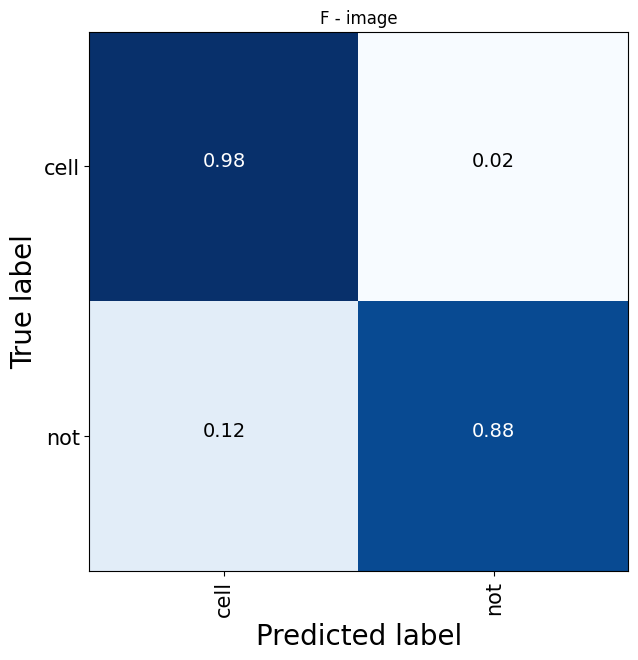

----------------------------------------
ACCURACY: 0.98
RECALL: 1.0
PRECISION: 0.9615384615384616
SPECIFICITY: 0.96
----------------------------------------




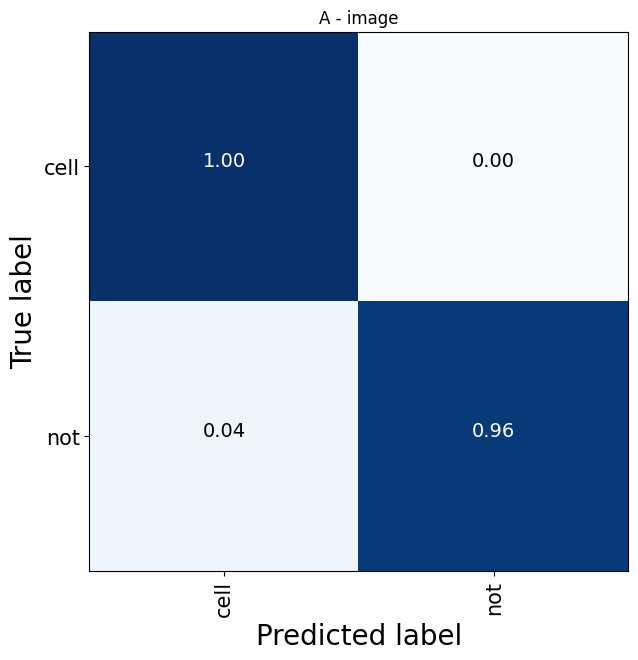

----------------------------------------
ACCURACY: 0.96
RECALL: 0.96
PRECISION: 0.96
SPECIFICITY: 0.96
----------------------------------------




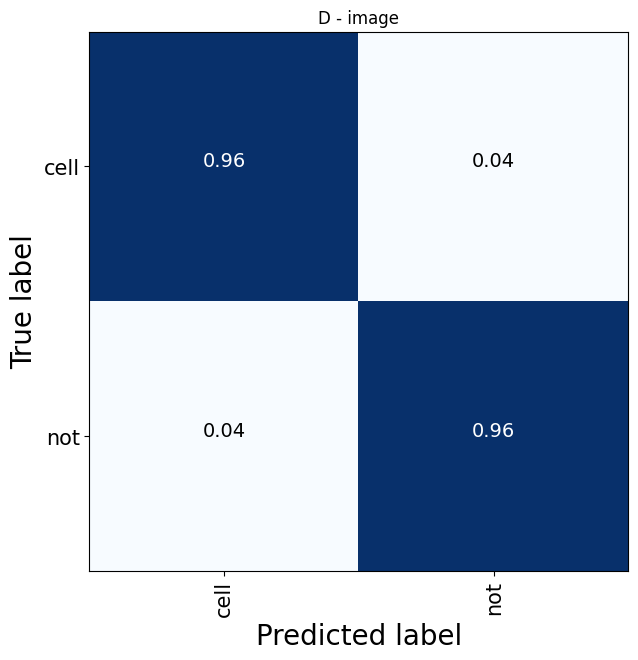

----------------------------------------
ACCURACY: 0.88
RECALL: 0.88
PRECISION: 0.88
SPECIFICITY: 0.88
----------------------------------------




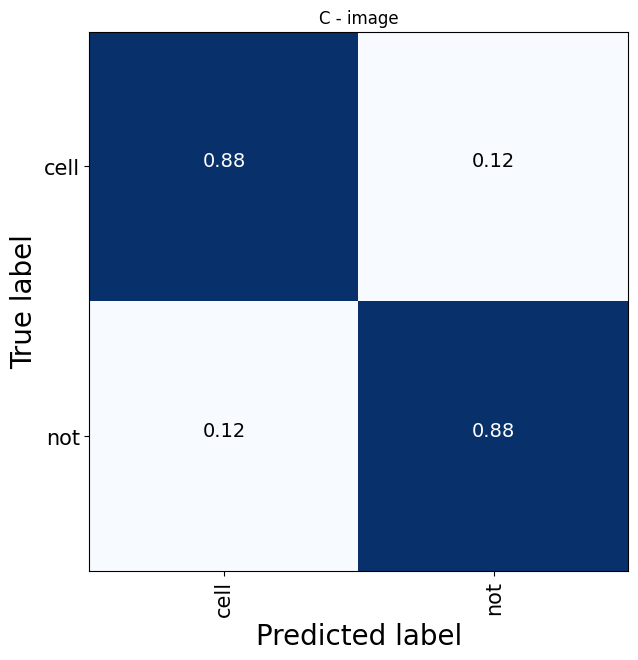

In [11]:
types_images=['cells', 'not']
images_groups = defaultdict(list)

for i in types_images:
  path_tmp=os.path.join(TEST_PATH,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      prefix = img[:1]
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups[prefix].append([img,y])


images_groups  = dict(images_groups )

# model = load_model(MODEL_PATH)
model = keras.models.load_model(MODEL_PATH)
for name,imgs in images_groups.items():
  plot_conf_matrix(model, imgs, name + ' - image')

In [12]:
results_df = pd.DataFrame(results)

print(results_df)

       Model  Accuracy  Recall  Precision  Specificity
0  E - image      0.93    0.86   1.000000         1.00
1  B - image      1.00    1.00   1.000000         1.00
2  F - image      0.93    0.98   0.890909         0.88
3  A - image      0.98    1.00   0.961538         0.96
4  D - image      0.96    0.96   0.960000         0.96
5  C - image      0.88    0.88   0.880000         0.88


# Predictions - special cells

In [13]:
types_images=['cells','not']
images_groups=[]

for i in types_images:
  path_tmp=os.path.join(TEST_PATH,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups.append([img,y])

model = load_model(MODEL_PATH)
label_test = []
pred_test = []
for i, batch in enumerate(images_groups):
    X, y = batch
    label_test.append(y)
    predictions = model.predict(X,verbose=0)
    pred_test.append(predictions)
label_test = np.argmax(np.vstack(label_test), axis=1)
### COMPUTE PREDICTIONS ON TEST DATA ###
pred_test = np.argmax(np.vstack(pred_test), axis=1)
accuracy=accuracy_score(label_test, pred_test)
recall=recall_score(label_test, pred_test,pos_label=0)
specificity=recall_score(label_test, pred_test,pos_label=1)
precision = precision_score(label_test, pred_test, pos_label=0)
# pred_test = pred_test[:label_test.shape[0],]
### ACCURACY ON TEST DATA ###
print("-" * 40)
print('ACCURACY:', accuracy)
print('RECALL:',recall)
print('PRECISION:', precision)
print('SPECIFICITY:',specificity)
print("-" * 40)
print("\n")

----------------------------------------
ACCURACY: 0.9466666666666667
RECALL: 0.9466666666666667
PRECISION: 0.9466666666666667
SPECIFICITY: 0.9466666666666667
----------------------------------------


